<a href="https://colab.research.google.com/github/Andriusma1989/ML_sales_data/blob/main/CA_ML_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- K-NN ---
Best parameters: {'algorithm': 'auto', 'metric': 'chebyshev', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Cross-validation score (f1): 0.913
Test score (f1): 0.930
Test score (accuracy): 0.930


<ipython-input-5-26b684ba3359>:87: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


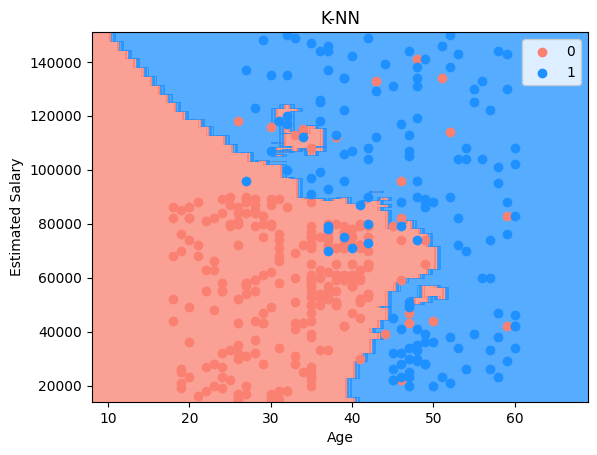

K-NN test set F1-score: 0.906
K-NN test set accuracy: 0.940

--- Decision Tree ---
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Cross-validation score (f1): 0.900
Test score (f1): 0.940
Test score (accuracy): 0.940


<ipython-input-5-26b684ba3359>:87: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


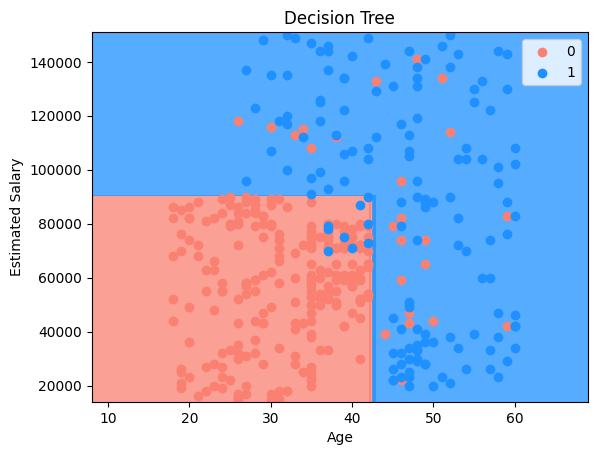

Decision Tree test set F1-score: 0.909
Decision Tree test set accuracy: 0.940

--- Random Forest ---
Best parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Cross-validation score (f1): 0.910
Test score (f1): 0.940
Test score (accuracy): 0.940


<ipython-input-5-26b684ba3359>:87: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


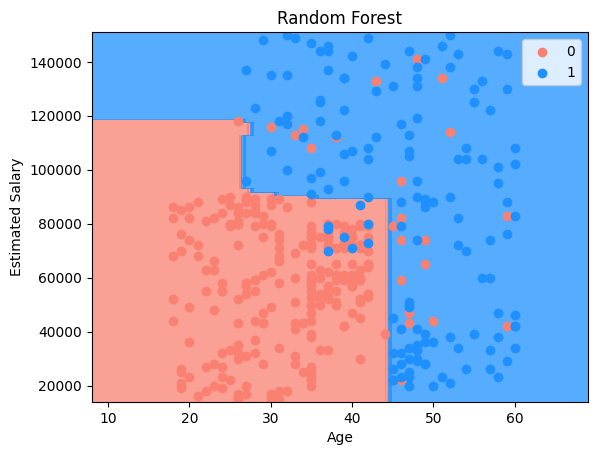

Random Forest test set F1-score: 0.909
Random Forest test set accuracy: 0.940

Best model: K-NN


<ipython-input-5-26b684ba3359>:117: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


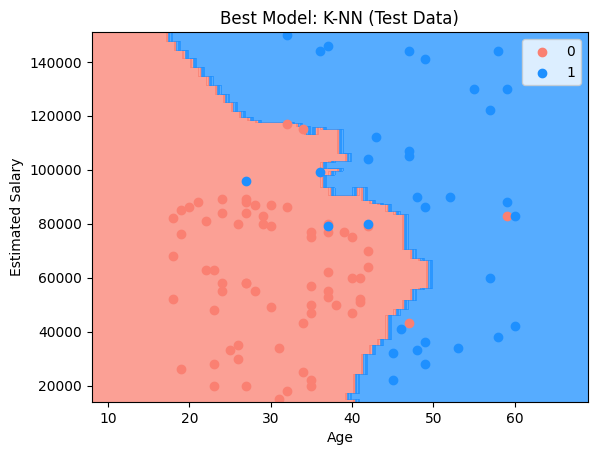

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from matplotlib.colors import ListedColormap
from collections import defaultdict

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/CA/ML homework/Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature scaling
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Define the models and their hyperparameters
models = [
    {
        'name': 'K-NN',
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 10, 15],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p': [1, 2, 3],
            'metric': ['euclidean', 'manhattan', 'chebyshev'] 
        }
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'params': {
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2'],
              'splitter': ['best', 'random']
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
]

# Store model scores
model_scores = defaultdict(dict)

# Perform grid search with k-fold cross-validation for each model
for model in models:
    print(f'--- {model["name"]} ---')
    grid = GridSearchCV(model['model'], model['params'], cv=10, scoring=['f1', 'accuracy'], refit='accuracy')
    grid.fit(X_train, y_train)
    print(f'Best parameters: {grid.best_params_}')
    print(f'Cross-validation score (f1): {grid.best_score_:.3f}')
    print(f'Test score (f1): {grid.score(X_test, y_test):.3f}')
    print(f'Test score (accuracy): {accuracy_score(y_test, grid.predict(X_test)):.3f}')
    

    # Fit the best model to the full dataset and visualize the decision boundary
    model['model'] = model['model'].__class__(**grid.best_params_)
    model['model'].fit(X, y)
    X_set, y_set = sc.inverse_transform(X), y
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
                         np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1))
    plt.contourf(X1, X2, model['model'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)
    plt.title(model['name'])
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

    # Evaluate the performance of the model on the test set
    y_pred = model['model'].predict(X_test)
    # Store model scores
    model_scores[model['name']]['f1'] = f1_score(y_test, y_pred)
    model_scores[model['name']]['accuracy'] = accuracy_score(y_test, y_pred)
    print(f'{model["name"]} test set F1-score: {f1_score(y_test, y_pred):.3f}')
    print(f'{model["name"]} test set accuracy: {accuracy_score(y_test, y_pred):.3f}\n')

# Determine the best model based on accuracy
best_model_name = max(model_scores, key=lambda x: model_scores[x]['accuracy'])
best_model = next(model for model in models if model['name'] == best_model_name)
print(f'Best model: {best_model_name}')

# Visualize the decision boundary of the best model on the test data
best_model['model'].fit(X_test, y_test)
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1))
plt.contourf(X1, X2, best_model['model'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)
plt.title(f'Best Model: {best_model_name} (Test Data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()





